# Mitigation: Renewable Energy

Electricity generation and electricity installed capacity, classified by energy type (renewable and non-renewable) and 10 technology types.

The data has been sourced from the International Renewable Energy Agency (https://pxweb.irena.org/pxweb/en/IRENASTAT).

The indicators on energy transition have been formulated to help users understand the progress in the adoption of renewable energy sources vis-à-vis the increasing energy requirements.

Sources: International Renewable Energy Agency (IRENA) (2022), Renewable Energy Statistics 2022, https://pxweb.irena.org/pxweb/en/IRENASTAT. Accessed on 2022-09-28; IMF Staff Calculations.


## Data Dictionary

| Column        | Description                                                                                      |
|---------------|--------------------------------------------------------------------------------------------------|
| ObjectId      | A unique identifier for each row in the dataset.                                                   |
| Country       | The name of the country to which the data corresponds.                                            |
| ISO2          | The two-letter country code (ISO 3166-1 alpha-2).                                                 |
| ISO3          | The three-letter country code (ISO 3166-1 alpha-3).                                               |
| Indicator     | Describes the type of indicator, such as "Electricity Generation" or "Electricity Installed Capacity." |
| Technology    | Specifies the type of technology used for electricity generation or installed capacity (e.g., Bioenergy, Fossil fuels, Geothermal energy). |
| Energy_Type   | Indicates whether the energy source is renewable or non-renewable.                                |
| Unit          | The unit of measurement for the data in the corresponding columns (e.g., Gigawatt-hours (GWh) for electricity generation, Megawatts (MW) for installed capacity). |
| Source        | Identifies the source of the data, in this case, the International Renewable Energy Agency (IRENA). |
| CTS_Name      | The name associated with the Common Tabulation Structure (CTS) for the data.                        |
| F2013 - F2022 | Columns representing the numerical data for each respective year from 2013 to 2022. These values contain information related to electricity generation or installed capacity, depending on the indicator and unit of measurement. |



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a data frame using Pandas

In [ ]:
df = pd.read_csv('Energy_Transition.csv')

## Overview of the dataset

Before preprocessing the data, we should explore the number of rows & columns, ranges of values of our dataset.

In [ ]:
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Technology,Energy_Type,Unit,Source,CTS_Name,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,Advanced Economies,NaN,AETMP,Electricity Generation,Bioenergy,Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,...,239640.576,252158.172,264818.971,276056.357,283070.492,287896.712,293588.304,295120.203,305534.149,NaN
1,2,Advanced Economies,NaN,AETMP,Electricity Installed Capacity,Bioenergy,Total Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,...,46735.884,48957.209,51141.829,53558.147,55928.762,58784.512,60506.886,61435.714,60191.382,61642.076
2,3,Advanced Economies,NaN,AETMP,Electricity Generation,Fossil fuels,Total Non-Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,...,6103856.918,5966436.270,5895416.489,5862722.833,5724890.811,5783838.801,5557306.272,5242216.071,5399809.867,NaN
3,4,Advanced Economies,NaN,AETMP,Electricity Installed Capacity,Fossil fuels,Total Non-Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,...,1535785.321,1543697.011,1520695.067,1507693.183,1505545.142,1516077.653,1490202.489,1480381.560,1474449.617,1463021.433
4,5,Advanced Economies,NaN,AETMP,Electricity Generation,Geothermal energy,Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,...,38936.706,40294.244,40949.973,40915.479,41097.443,41910.939,41890.201,42477.922,42591.530,NaN


In [ ]:
# number of rows & columns
df.shape

(2617, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             2617 non-null   int64  
 1   Country              2617 non-null   object 
 2   ISO2                 2139 non-null   object 
 3   ISO3                 2617 non-null   object 
 4   Indicator            2617 non-null   object 
 5   Technology           2617 non-null   object 
 6   Energy_Type          2617 non-null   object 
 7   Unit                 2617 non-null   object 
 8   Source               2617 non-null   object 
 9   CTS_Name             2617 non-null   object 
 10  CTS_Code             2617 non-null   object 
 11  CTS_Full_Descriptor  2617 non-null   object 
 12  F2000                1837 non-null   float64
 13  F2001                1894 non-null   float64
 14  F2002                1924 non-null   float64
 15  F2003                1940 non-null   f

We try to do data reduction to our dataset.

In our dataset, the column 'ObjectId' have only ID values, 'ISO2' and 'ISO3' have only represent the country code and we assuming they don't have any predictive power to predict the dependent variable.

In [ ]:
df = df.drop('ObjectId', axis=1)

In [ ]:
df = df.drop('ISO2', axis=1)

In [ ]:
df = df.drop('ISO3', axis=1)

In [ ]:
df.dtypes

Country                 object
Indicator               object
Technology              object
Energy_Type             object
Unit                    object
Source                  object
CTS_Name                object
CTS_Code                object
CTS_Full_Descriptor     object
F2000                  float64
F2001                  float64
F2002                  float64
F2003                  float64
F2004                  float64
F2005                  float64
F2006                  float64
F2007                  float64
F2008                  float64
F2009                  float64
F2010                  float64
F2011                  float64
F2012                  float64
F2013                  float64
F2014                  float64
F2015                  float64
F2016                  float64
F2017                  float64
F2018                  float64
F2019                  float64
F2020                  float64
F2021                  float64
F2022                  float64
dtype: o

Then, we will check missing values in our dataset

In [ ]:
# check for missing values
df.isna().sum()

Country                   0
Indicator                 0
Technology                0
Energy_Type               0
Unit                      0
Source                    0
CTS_Name                  0
CTS_Code                  0
CTS_Full_Descriptor       0
F2000                   780
F2001                   723
F2002                   693
F2003                   677
F2004                   660
F2005                   611
F2006                   591
F2007                   537
F2008                   504
F2009                   441
F2010                   383
F2011                   326
F2012                   266
F2013                   200
F2014                   169
F2015                   137
F2016                   112
F2017                    87
F2018                    78
F2019                    71
F2020                    51
F2021                    44
F2022                  1322
dtype: int64

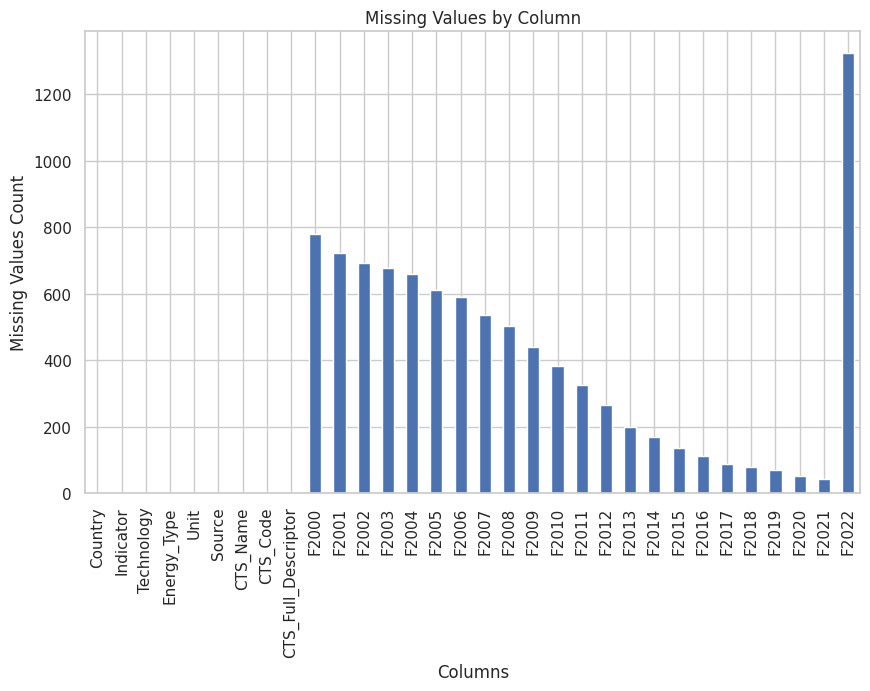

In [ ]:
missing_by_column = df.isnull().sum()
missing_by_column.plot(kind='bar', figsize=(10, 6))
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.show()

We found out that Tax values or indicators for respective years have a lot of missing values in their each columns. Hence, we do replace the null values with 0 to ensures that our calculations and visualizations are consistent and correct. It also helps to avoid errors and ensures that your data is clean and accurate.

In [ ]:
df['F2000'].fillna(0, inplace=True)
df['F2001'].fillna(0, inplace=True)
df['F2002'].fillna(0, inplace=True)
df['F2003'].fillna(0, inplace=True)
df['F2004'].fillna(0, inplace=True)
df['F2005'].fillna(0, inplace=True)
df['F2006'].fillna(0, inplace=True)
df['F2007'].fillna(0, inplace=True)
df['F2008'].fillna(0, inplace=True)
df['F2009'].fillna(0, inplace=True)
df['F2010'].fillna(0, inplace=True)
df['F2011'].fillna(0, inplace=True)
df['F2012'].fillna(0, inplace=True)
df['F2013'].fillna(0, inplace=True)
df['F2014'].fillna(0, inplace=True)
df['F2015'].fillna(0, inplace=True)
df['F2016'].fillna(0, inplace=True)
df['F2017'].fillna(0, inplace=True)
df['F2018'].fillna(0, inplace=True)
df['F2019'].fillna(0, inplace=True)
df['F2020'].fillna(0, inplace=True)
df['F2021'].fillna(0, inplace=True)

For the year 2022, we drop the column due to the lack of valueble data

In [ ]:
df = df.drop('F2022', axis=1)

In [ ]:
df.isna().sum()

Country                0
Indicator              0
Technology             0
Energy_Type            0
Unit                   0
Source                 0
CTS_Name               0
CTS_Code               0
CTS_Full_Descriptor    0
F2000                  0
F2001                  0
F2002                  0
F2003                  0
F2004                  0
F2005                  0
F2006                  0
F2007                  0
F2008                  0
F2009                  0
F2010                  0
F2011                  0
F2012                  0
F2013                  0
F2014                  0
F2015                  0
F2016                  0
F2017                  0
F2018                  0
F2019                  0
F2020                  0
F2021                  0
dtype: int64

In [ ]:
df.columns

Index(['Country', 'Indicator', 'Technology', 'Energy_Type', 'Unit', 'Source',
       'CTS_Name', 'CTS_Code', 'CTS_Full_Descriptor', 'F2000', 'F2001',
       'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009',
       'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017',
       'F2018', 'F2019', 'F2020', 'F2021'],
      dtype='object')

Rename all of the year column that starts with F by removing the F letter.

In [ ]:
new_columns = {col: col[1:] if col.startswith('F') else col for col in df.columns[9:]}
df.rename(columns=new_columns, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              2617 non-null   object 
 1   Indicator            2617 non-null   object 
 2   Technology           2617 non-null   object 
 3   Energy_Type          2617 non-null   object 
 4   Unit                 2617 non-null   object 
 5   Source               2617 non-null   object 
 6   CTS_Name             2617 non-null   object 
 7   CTS_Code             2617 non-null   object 
 8   CTS_Full_Descriptor  2617 non-null   object 
 9   2000                 2617 non-null   float64
 10  2001                 2617 non-null   float64
 11  2002                 2617 non-null   float64
 12  2003                 2617 non-null   float64
 13  2004                 2617 non-null   float64
 14  2005                 2617 non-null   float64
 15  2006                 2617 non-null   f

In [ ]:
df.head()

,Country,Indicator,Technology,Energy_Type,Unit,Source,CTS_Name,CTS_Code,CTS_Full_Descriptor,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Advanced Economies,Electricity Generation,Bioenergy,Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Economic Activity...",110529.797,...,224807.603,239640.576,252158.172,264818.971,276056.357,283070.492,287896.712,293588.304,295120.203,305534.149
1,Advanced Economies,Electricity Installed Capacity,Bioenergy,Total Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,ECNEC,"Environment, Climate Change, Economic Activity...",17792.003,...,44313.883,46735.884,48957.209,51141.829,53558.147,55928.762,58784.512,60506.886,61435.714,60191.382
2,Advanced Economies,Electricity Generation,Fossil fuels,Total Non-Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Economic Activity...",5564058.840,...,6192503.018,6103856.918,5966436.270,5895416.489,5862722.833,5724890.811,5783838.801,5557306.272,5242216.071,5399809.867
3,Advanced Economies,Electricity Installed Capacity,Fossil fuels,Total Non-Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,ECNEC,"Environment, Climate Change, Economic Activity...",1267339.571,...,1548594.145,1535785.321,1543697.011,1520695.067,1507693.183,1505545.142,1516077.653,1490202.489,1480381.560,1474449.617
4,Advanced Economies,Electricity Generation,Geothermal energy,Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Economic Activity...",26919.100,...,38076.418,38936.706,40294.244,40949.973,40915.479,41097.443,41910.939,41890.201,42477.922,42591.530


We do some quick and simple description of the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2000,2617.0,46101.210069,370284.314278,0.0,0.000,52.000,2085.105,9.959860e+06
2001,2617.0,46344.241060,371567.384331,0.0,0.000,56.000,2235.944,1.007336e+07
2002,2617.0,48112.587048,387891.788507,0.0,0.000,63.755,2304.000,1.055768e+07
2003,2617.0,49781.814042,405619.288270,0.0,0.000,68.600,2469.000,1.113742e+07
2004,2617.0,51912.910622,422370.209755,0.0,0.000,79.276,2714.020,1.161417e+07
2005,2617.0,53978.068417,441381.172311,0.0,0.047,91.000,2983.000,1.215982e+07
2006,2617.0,55955.334885,458603.887006,0.0,0.100,101.000,3135.696,1.267682e+07
2007,2617.0,58293.601347,485185.464398,0.0,0.280,117.376,3385.800,1.349740e+07
2008,2617.0,59596.909432,492057.353588,0.0,0.420,128.220,3581.000,1.368414e+07
2009,2617.0,59683.519073,486643.539200,0.0,0.915,149.058,3830.000,1.348284e+07


Describe function is a useful way to know the characteristics of data by getting a summary about the data.

Below are some findings that we get so far:

1. Count: There are 2617 data points for each of the years ('2000' to '2022').

2. Mean: For each year from '2000' to '2022', the mean value increases gradually over the years. However, there are significant differences between the mean values of different years, indicating variations in the data.

3. Standard Deviation: The standard deviation for each year ('2000' to '2022') is relatively high compared to the mean, suggesting a wide dispersion or variability in the data points.

4. Minimum and Maximum: The minimum values are 0 for all years, suggesting the presence of zero values or a considerable number of data points with no values recorded. The maximum values show an increasing trend over the years, indicating the presence of outliers or extremely high values in the dataset.

5. Percentiles (25%, 50%, 75%): The percentiles show the distribution of the data, with 25%, 50%, and 75% of the data falling below certain values for each year. There's a notable increase in percentiles as we move from lower to higher percentiles, indicating a skewed distribution with some high-value outliers.

Observations:

- The dataset seems to have a wide range of values, including a substantial number of zeros.
- There's a steady increase in the mean values from '2000' to '2022', suggesting a potential trend or growth over time.
- The high standard deviation and significant differences between the percentiles indicate heterogeneity and variability in the data distribution across different years.

These statistics provide insights into the central tendency, variability, and distribution of the data for each year. Further analysis, including outlier treatment and understanding the context of zero values, may be necessary to draw accurate conclusions or perform meaningful analysis on this dataset.


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,2617,248,Advanced Economies,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator,2617,2,Electricity Installed Capacity,1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Technology,2617,10,Fossil fuels,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Energy_Type,2617,2,Total Renewable,1731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit,2617,2,Megawatt (MW),1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,2617,1,International Renewable Energy Agency (IRENA) ...,2617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTS_Name,2617,2,Electricity Installed Capacity,1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTS_Code,2617,2,ECNEC,1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTS_Full_Descriptor,2617,2,"Environment, Climate Change, Economic Activity...",1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,2617.0,NaN,NaN,NaN,46101.210069,370284.314278,0.0,0.0,52.0,2085.105,9959860.346157


We separate Numerical and categorical variables for easy analysis

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Country', 'Indicator', 'Technology', 'Energy_Type', 'Unit', 'Source',
       'CTS_Name', 'CTS_Code', 'CTS_Full_Descriptor'],
      dtype='object')
Numerical Variables:
['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


We melt the DataFrame for easier pivoting, convert the 'Year' to numeric type, and create a pivot table to display the power generation values by country, energy type, and technology over different years.

In [ ]:
selected_columns = ['Country', 'Energy_Type', 'Technology'] + num_cols
pivot_data = df[selected_columns]

# Melt the DataFrame for easier pivot
melted_data = pivot_data.melt(id_vars=['Country', 'Energy_Type', 'Technology'], var_name='Year', value_name='Power_Generation')

# Convert 'Year' to numeric type
melted_data['Year'] = melted_data['Year'].str.extract('(\d+)').astype(int)

# Create the pivot table
pivot_table = melted_data.pivot_table(index=['Country', 'Energy_Type', 'Technology'], columns='Year', values='Power_Generation', aggfunc='sum')

# Display the pivot table
pivot_table

Year                                                                             2000  \
Country            Energy_Type         Technology                                       
Advanced Economies Total Non-Renewable Fossil fuels                       6831398.411   
                                       Nuclear                            2510986.000   
                                       Other non-renewable energy           79307.396   
                                       Pumped storage                      141030.299   
                   Total Renewable     Bioenergy                           128321.800   
...                                                                               ...   
Zambia             Total Renewable     Solar energy                             0.000   
Zimbabwe           Total Non-Renewable Fossil fuels                          4983.372   
                   Total Renewable     Bioenergy                              146.050   
                                       Hydropower (excl. Pumped Storage)     3872.624   
                                       Solar energy                             0.000   

Year                                                                             2001  \
Country            Energy_Type         Technology                                       
Advanced Economies Total Non-Renewable Fossil fuels                       6769685.682   
                                       Nuclear                            2540231.900   
                                       Other non-renewable energy           81489.806   
                                       Pumped storage                      136133.480   
                   Total Renewable     Bioenergy                           127647.086   
...                                                                               ...   
Zambia             Total Renewable     Solar energy                             0.000   
Zimbabwe           Total Non-Renewable Fossil fuels                          6113.372   
                   Total Renewable     Bioenergy                              154.100   
                                       Hydropower (excl. Pumped Storage)     3672.624   
                                       Solar energy                             0.418   

Year                                                                             2002  \
Country            Energy_Type         Technology                                       
Advanced Economies Total Non-Renewable Fossil fuels                       7038484.281   
                                       Nuclear                            2553452.000   
                                       Other non-renewable energy           63505.380   
                                       Pumped storage                      135815.090   
                   Total Renewable     Bioenergy                           138585.590   
...                                                                               ...   
Zambia             Total Renewable     Solar energy                             0.000   
Zimbabwe           Total Non-Renewable Fossil fuels                          5974.372   
                   Total Renewable     Bioenergy                              154.849   
                                       Hydropower (excl. Pumped Storage)     4472.624   
                                       Solar energy                             0.418   

Year                                                                             2003  \
Country            Energy_Type         Technology                                       
Advanced Economies Total Non-Renewable Fossil fuels                       7238103.252   
                                       Nuclear                            2503604.860   
                                       Other non-renewable energy           63302.849   
                                       Pumped storage                      137389

## Research Questions

1. How has the energy usage across different countries and technologies evolved over the years?
2. What is the proportion of electricity generated from renewable sources compared to non-renewable sources globally?
3. Are there notable differences in the distribution of electricity generation between renewable and non-renewable sources, and what factors may have contributed to these differences?
4. What is the most used energy type over the years?
5. Which countries lead in terms of the highest percentage of electricity generated from renewable sources?
6. How well does the environmental tax data from 2013 predict the environmental taxes in 2021 ?

### Q1: How has the energy usage across different countries and technologies evolved over the years?

In [ ]:
df['Country'].unique()

array(['Advanced Economies', 'Afghanistan, Islamic Rep. of', 'Africa',
       'Albania', 'Algeria', 'American Samoa', 'Americas',
       'Andorra, Principality of', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia, Rep. of',
       'Aruba, Kingdom of the Netherlands', 'Asia', 'Australia',
       'Austria', 'Azerbaijan, Rep. of', 'Bahamas, The',
       'Bahrain, Kingdom of', 'Bangladesh', 'Barbados',
       'Belarus, Rep. of', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bonaire, St. Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Rep.', 'Central Asia',
       'Chad', 'Chile', 'China, P.R.: Hong Kong', 'China, P.R.: Mainland',
       'Colombia', 'Comoros, Union of the', 'Congo, Dem. Rep. of the',
       'Congo, Rep. of', 'Cook Islands

First of all as we can see from the output of the code below, there are various of countries which would be overwhelming for us.

Hence, we decided to take top 5 countries.

In [ ]:
selected_columns = ['Country'] + num_cols
country_technology_data = df[selected_columns]

Take the relevent columns for the comparison.

In [ ]:
# Calculate total energy usage for each country across all years
country_total_energy = country_technology_data.groupby('Country')[selected_columns[1:]].sum().sum(axis=1)
top_5_countries = country_total_energy.sort_values(ascending=False).head(5).index

# Filter the data for the top 5 countries
top_5_country_technology_data = country_technology_data[country_technology_data['Country'].isin(top_5_countries)]

# Melt the DataFrame for easier plotting
melted_top_5_country_technology_data = top_5_country_technology_data.melt(id_vars='Country', var_name='Year', value_name='Energy_Usage')

The melt function in pandas is used to transform or reshape data from wide format to long format. In the context of our data, where columns like '2000', '2001', ..., '2021' represent different years, melting is essential for creating a 'Year' column and stacking the data appropriately for plotting.

In [ ]:
melted_top_5_country_technology_data['Year'] = melted_top_5_country_technology_data['Year'].str.extract('(\d+)').astype(int)

We want to convert 'Year' to numeric type

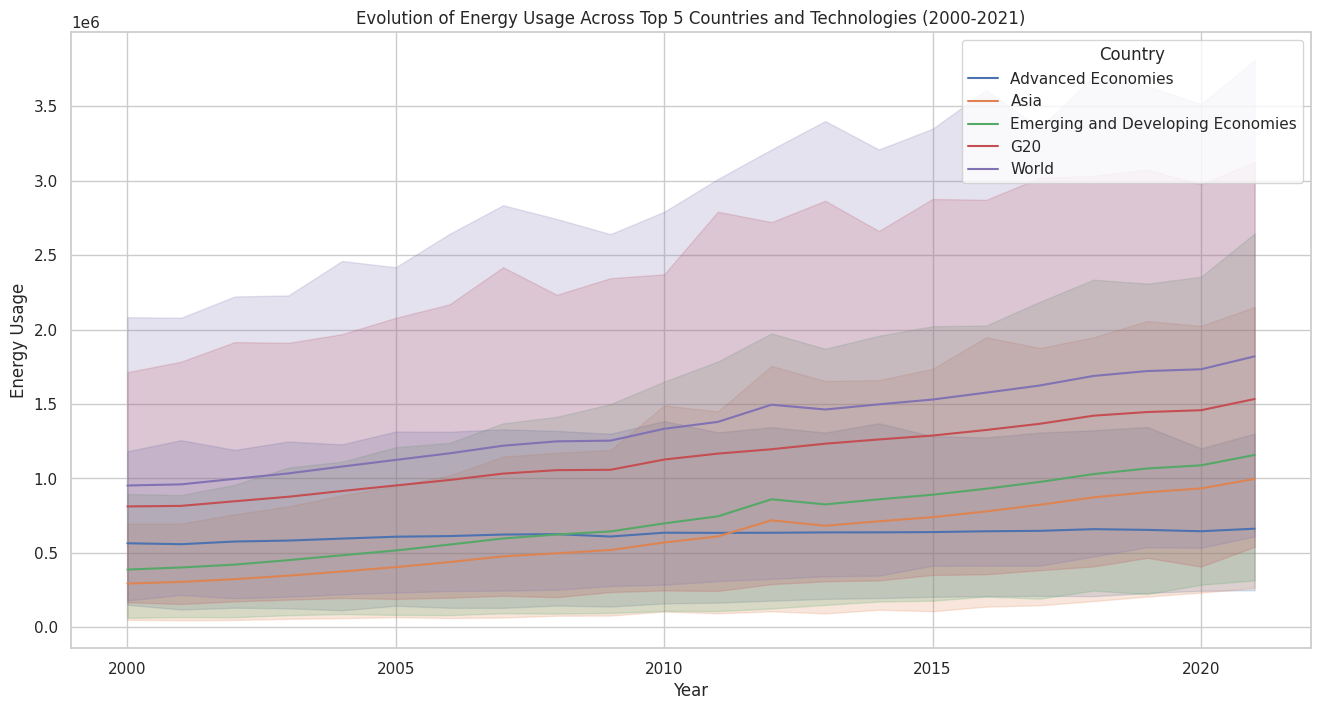

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.lineplot(x='Year', y='Energy_Usage', hue='Country', data=melted_top_5_country_technology_data)
plt.title('Evolution of Energy Usage Across Top 5 Countries and Technologies (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Energy Usage')
plt.show()

As we can see, this line plot illustrates how energy usage has evolved across top 5 countries and technologies from 2000 to 2022. Each country is represented by a unique color, and the lines depict the trends in energy usage over the specified years.

Then we can try to aggregate and group between the columns



*   The graph shows that energy usage for all categories has been increasing over time. This aligns with the fact that global energy consumption has increased nearly every year for more than half a century. The exceptions to this were in the early 1980s and 2009, likely due to economic downturns.
*   While global energy consumption continues to grow, the rate of increase seems to be slowing, averaging around 1% to 2% per year1. This could be due to improvements in energy efficiency and the adoption of renewable energy sources.

* The graph also indicates that energy usage varies significantly between different regions. For instance, the energy usage of ‘Advanced Economies’ and ‘Asia’ shows different trends. This could be due to differences in industrialization, population growth, economic development, and energy policies.

* The purple line represents the world’s total energy consumption, which is the highest among all categories. This is expected as it includes energy usage from all countries and regions.

* The shaded areas around each line indicate some form of variability or uncertainty in the data. This could be due to factors such as changes in energy policies, economic fluctuations, technological advancements, and data collection methods.

* These trends highlight the importance of sustainable energy solutions and energy efficiency in meeting the world’s growing energy needs. They also underscore the challenges of transitioning away from fossil fuels towards low-carbon sources of energy.

In [ ]:
# Group by 'Country' and sum energy usage across all years
country_total_energy = df.groupby('Country')[num_cols].sum()

# Group by 'Technology' and sum energy usage across all years
technology_total_energy = df.groupby('Technology')[num_cols].sum()

# Group by 'Country' and calculate the mean energy usage across all years
country_avg_energy = df.groupby('Country')[num_cols].mean()

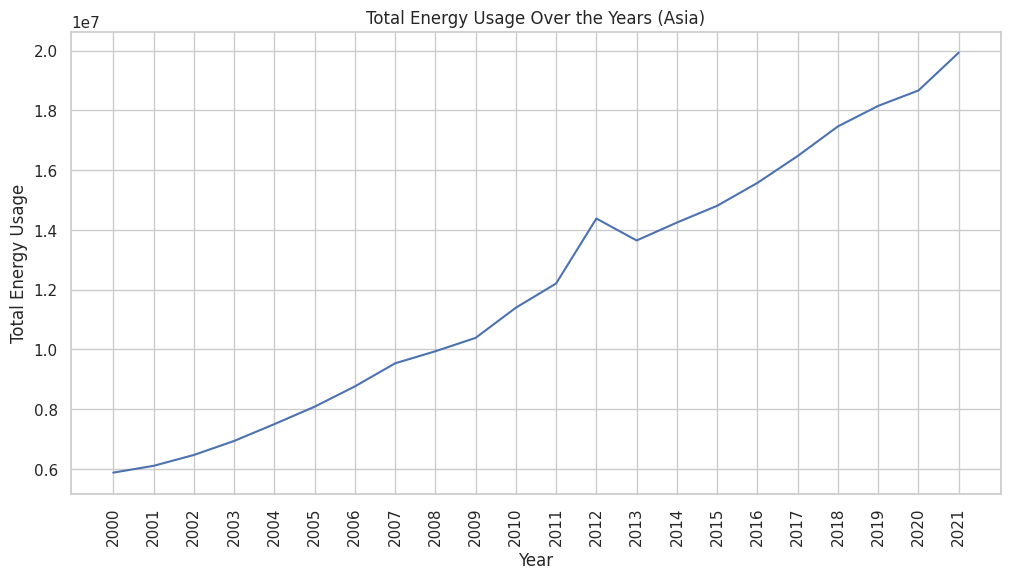

In [ ]:
# Example: Line plot for total energy usage over the years for a specific country
plt.figure(figsize=(12, 6))
sns.lineplot(data=country_total_energy.loc['Asia'])
plt.title('Total Energy Usage Over the Years (Asia)')
plt.xlabel('Year')
plt.ylabel('Total Energy Usage')
plt.xticks(rotation=90)
plt.show()

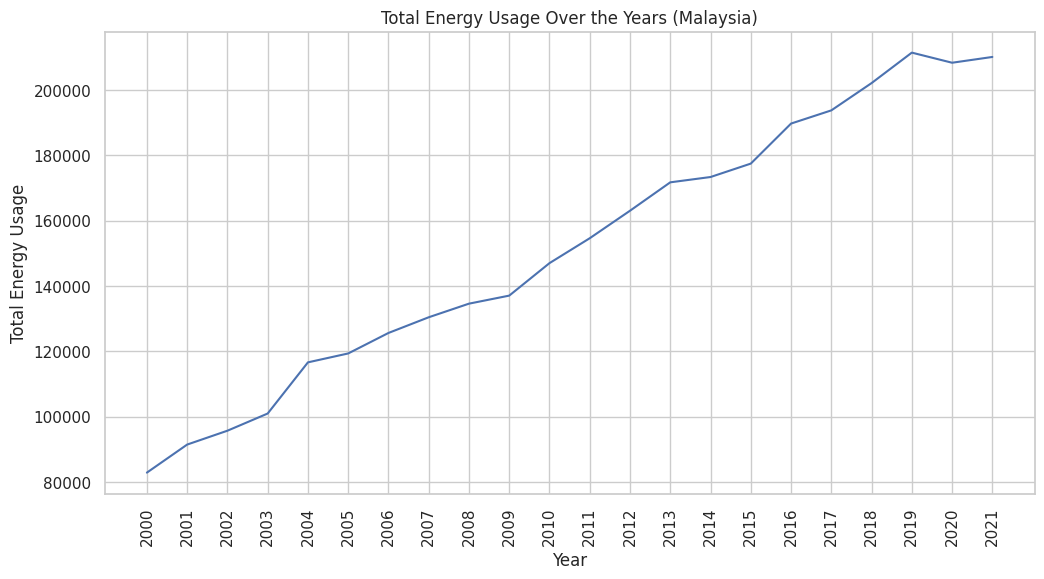

In [ ]:
# Example: Line plot for total energy usage over the years for a specific country
plt.figure(figsize=(12, 6))
sns.lineplot(data=country_total_energy.loc['Malaysia'])
plt.title('Total Energy Usage Over the Years (Malaysia)')
plt.xlabel('Year')
plt.ylabel('Total Energy Usage')
plt.xticks(rotation=90)
plt.show()

Investigate the correlation between Malaysia’s economic growth and energy consumption. Typically, as a country’s economy grows, so does its energy consumption due to increased industrial activities and demand from consumers.

Look into Malaysia’s energy policies during this period. The dip in 2019 could be the result of energy conservation initiatives or policies. Consider the impact of technological advancements on energy usage. Improvements in energy efficiency could lead to reduced energy consumption.


Next, we examine the relationship between population growth and energy usage. An increasing population might lead to increased demand for energy.

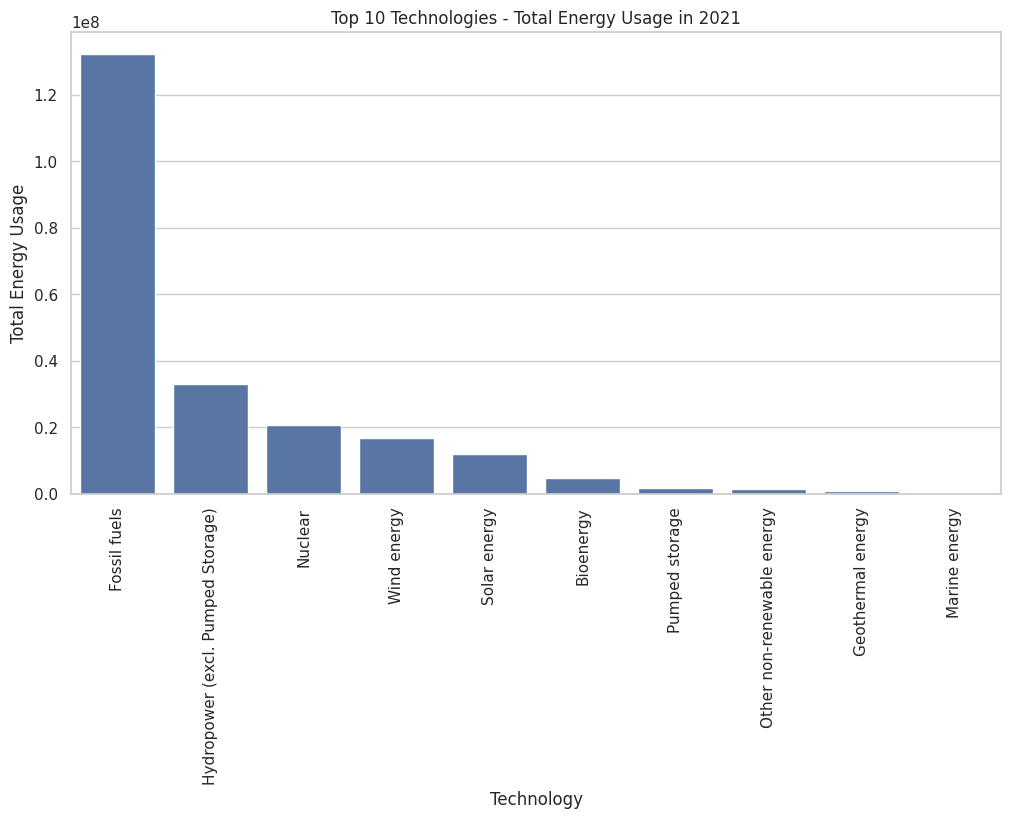

In [ ]:
# Get the top 10 technologies based on total energy usage in 2022
top_technologies = technology_total_energy['2021'].nlargest(10)

# Visualize total energy usage by technology using a bar plot for the top 10 technologies
plt.figure(figsize=(12, 6))
sns.barplot(x=top_technologies.index, y=top_technologies)
plt.title('Top 10 Technologies - Total Energy Usage in 2021')
plt.xlabel('Technology')
plt.ylabel('Total Energy Usage')
plt.xticks(rotation=90)
plt.show()

From the graph above, we can see that fossil fuels have the biggest total energy used compared to others.

This graph provides a clear picture of the total energy usage of different technologies in 2021. It shows that fossil fuels still dominate the energy sector, followed by hydropower and nuclear energy. Renewable energy sources like wind and solar energy are also represented, but their usage is significantly less than fossil fuels. This highlights the ongoing challenge of transitioning to renewable energy sources and the importance of continued research and development in this area.

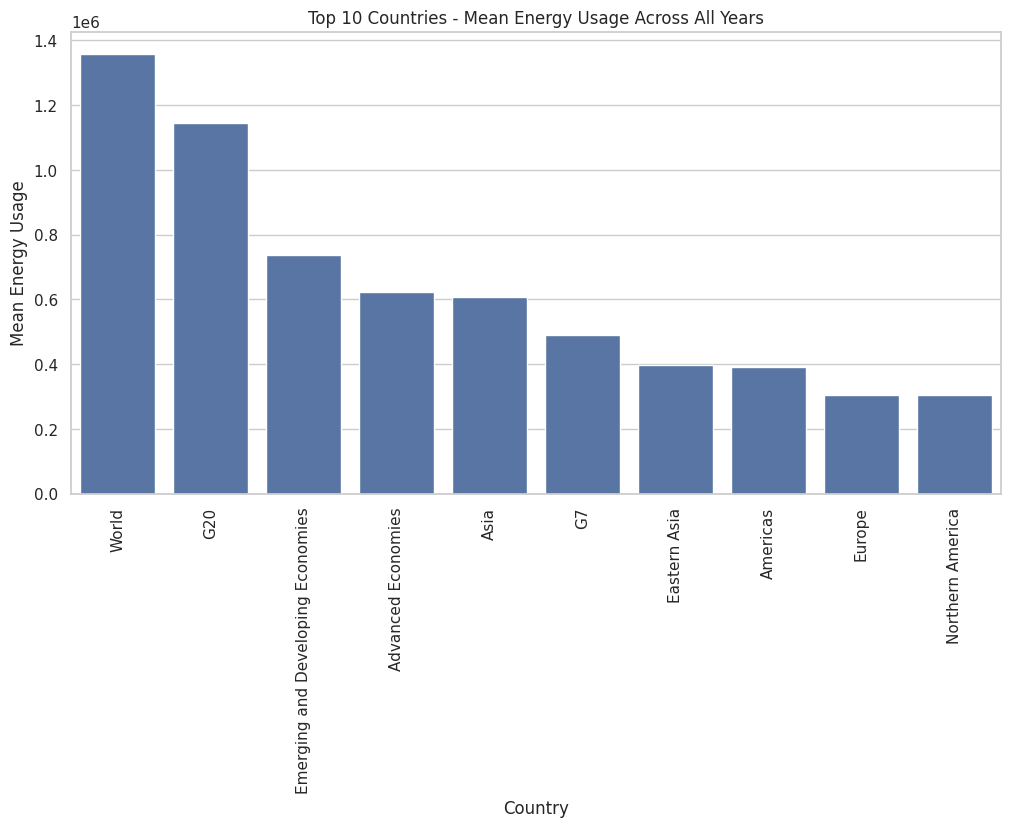

In [ ]:
# Get the top 10 countries based on mean energy usage across all years
top_countries_mean = country_avg_energy.mean(axis=1).nlargest(10)

# Visualize mean energy usage by country using a bar plot for the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_mean.index, y=top_countries_mean)
plt.title('Top 10 Countries - Mean Energy Usage Across All Years')
plt.xlabel('Country')
plt.ylabel('Mean Energy Usage')
plt.xticks(rotation=90)
plt.show()

The graph shows that the “World” has the highest mean energy usage, which aligns with the fact that global energy consumption has been increasing nearly every year.

The graph also indicates that energy usage varies significantly between different regions. For instance, the energy usage of ‘Advanced Economies’ and ‘Emerging & Developing Economies’ shows different trends. This could be due to differences in industrialization, population growth, economic development, and energy policies.

The energy mix of a country or region for example, the proportion of energy derived from various sources can also influence its mean energy usage. For example, countries that rely heavily on fossil fuels may have higher energy usage than those that have diversified their energy mix to include renewable sources.

Economic factors can also influence energy usage. For example, periods of economic growth are often associated with increased energy consumption, while economic downturns can lead to decreases in energy usage.

These trends highlight the importance of sustainable energy solutions and energy efficiency in meeting the world’s growing energy needs. They also underscore the challenges of transitioning away from fossil fuels towards low-carbon sources of energy.

### Q2: What is the proportion of electricity generated from renewable sources compared to non-renewable sources globally?

Proportion of electricity generated from renewable sources: 6.67%
Proportion of electricity generated from non-renewable sources: 93.33%


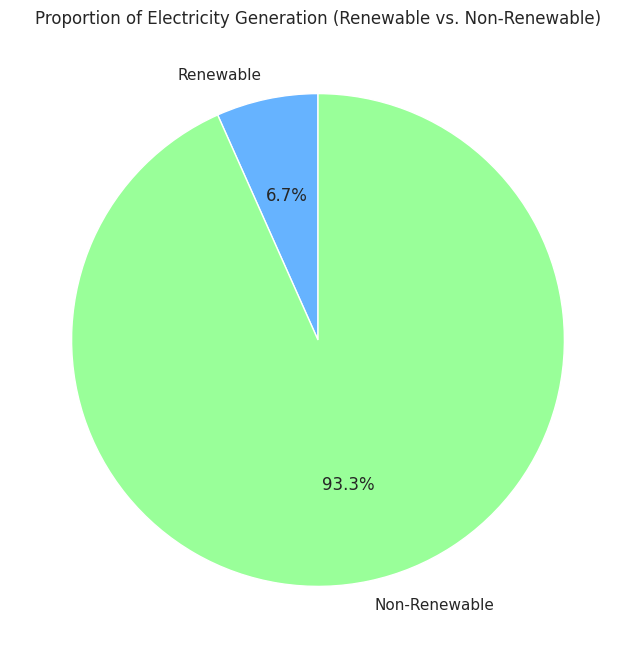

In [ ]:
selected_columns = ['Technology'] + num_cols
technology_data = df[selected_columns]

# Melt the DataFrame for easier analysis
melted_technology_data = technology_data.melt(id_vars='Technology', var_name='Year', value_name='Power_Generation')

# Convert 'Year' to numeric type
melted_technology_data['Year'] = melted_technology_data['Year'].str.extract('(\d+)').astype(int)

# Filter rows where Technology is related to renewable and non-renewable energy
renewable_technologies = ['Bioenergy', 'Geothermal energy', 'Hydropower (excl. Pumped Storage', 'Solar energy', 'Wind energy', 'Marine energy']
renewable_data = melted_technology_data[melted_technology_data['Technology'].isin(renewable_technologies)]
non_renewable_data = melted_technology_data[~melted_technology_data['Technology'].isin(renewable_technologies)]

# Calculate the global sum of power generation for renewable and non-renewable sources
total_renewable_power = renewable_data['Power_Generation'].sum()
total_non_renewable_power = non_renewable_data['Power_Generation'].sum()

# Calculate the proportions
proportion_renewable = total_renewable_power / (total_renewable_power + total_non_renewable_power)
proportion_non_renewable = total_non_renewable_power / (total_renewable_power + total_non_renewable_power)

# Print the results
print(f"Proportion of electricity generated from renewable sources: {proportion_renewable:.2%}")
print(f"Proportion of electricity generated from non-renewable sources: {proportion_non_renewable:.2%}")

labels = ['Renewable', 'Non-Renewable']
sizes = [proportion_renewable, proportion_non_renewable]
colors = ['#66b3ff', '#99ff99']  # Blue for renewable, Green for non-renewable

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proportion of Electricity Generation (Renewable vs. Non-Renewable)')
plt.show()

The fact that only 6.67% of global electricity is generated from renewable sources highlights the current dependence on non-renewable sources for power generation. This could be due to various factors such as the availability of resources, technology, infrastructure, and cost.

The data might indicate the stage of energy transition in different countries. Developed countries are generally further along in the transition to renewable energy, while developing countries may still rely heavily on non-renewable sources.

The high percentage of electricity generated from non-renewable sources has significant environmental implications, as these sources often emit greenhouse gases that contribute to climate change.

The trend towards renewable energy is expected to increase as technology improves and the costs of renewable energy sources continue to decrease.

The proportion of renewable vs non-renewable energy can be influenced by government policies. Incentives for renewable energy can lead to increased investment and usage.

### Q3: Are there notable differences in the distribution of electricity generation between renewable and non-renewable sources, and what factors may have contributed to these differences?

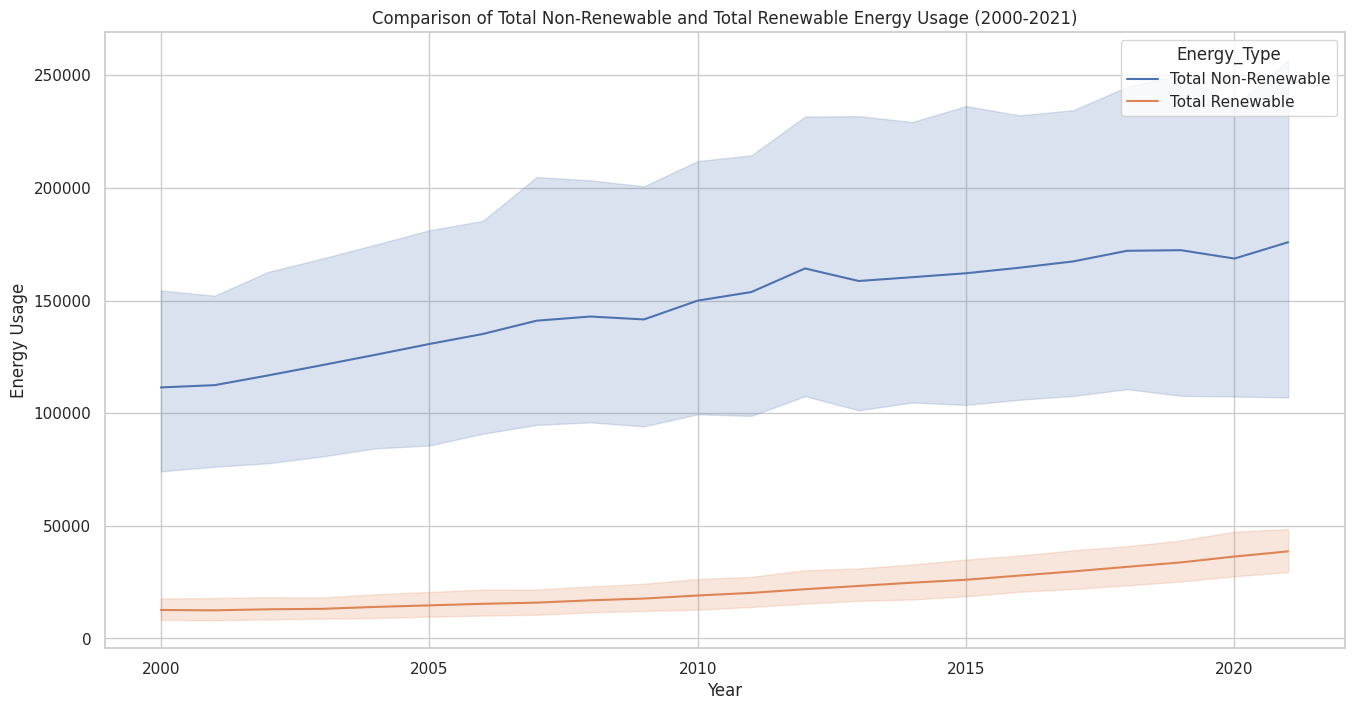

In [ ]:
# Filter data for 'Total Non-Renewable' and 'Total Renewable' energy types
total_non_renewable_data = df[df['Energy_Type'] == 'Total Non-Renewable']
total_renewable_data = df[df['Energy_Type'] == 'Total Renewable']

# Select relevant columns for the comparison
selected_columns = num_cols
total_non_renewable_data = total_non_renewable_data[selected_columns]
total_renewable_data = total_renewable_data[selected_columns]

# Melt the DataFrames for easier plotting
melted_non_renewable_data = total_non_renewable_data.melt(var_name='Year', value_name='Energy_Usage', ignore_index=False)
melted_renewable_data = total_renewable_data.melt(var_name='Year', value_name='Energy_Usage', ignore_index=False)

# Convert 'Year' to numeric type
melted_non_renewable_data['Year'] = melted_non_renewable_data['Year'].str.extract('(\d+)').astype(int)
melted_renewable_data['Year'] = melted_renewable_data['Year'].str.extract('(\d+)').astype(int)

# Set the style for better visualization
sns.set(style="whitegrid")

# Create a line plot for the comparison
plt.figure(figsize=(16, 8))
sns.lineplot(x='Year', y='Energy_Usage', hue='Energy_Type', data=pd.concat([melted_non_renewable_data.assign(Energy_Type='Total Non-Renewable'), melted_renewable_data.assign(Energy_Type='Total Renewable')]))
plt.title('Comparison of Total Non-Renewable and Total Renewable Energy Usage (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Energy Usage')
plt.show()

There is a noticable trend difference between both Energy types.

The graph shows that non-renewable energy usage has been consistently higher but has fluctuated over the years. This aligns with the fact that since the Industrial Revolution, the energy mix of most countries across the world has become dominated by fossil fuels.

The graph shows that renewable energy usage has been steadily increasing. This aligns with the fact that approximately one-seventh of the world’s primary energy is now sourced from renewable technologies. Renewable energy use increased 3% in 2020 as demand for all other fuels declined.

The increasing trend of renewable energy usage and the fluctuating trend of non-renewable energy usage indicate the ongoing transition from fossil fuels to renewable energy sources. To reduce CO2 emissions and local air pollution, the world needs to rapidly shift towards low-carbon sources of energy – nuclear and renewable technologies.

Renewable electricity generation in 2021 is set to expand by more than 8% to reach 8,300 TWh, the fastest year-on-year growth since the 1970s2. Solar PV and wind are set to contribute two-thirds of renewables growth.

These trends highlight the importance of sustainable energy solutions and energy efficiency in meeting the world’s growing energy needs. They also underscore the challenges of transitioning away from fossil fuels towards low-carbon sources of energy.

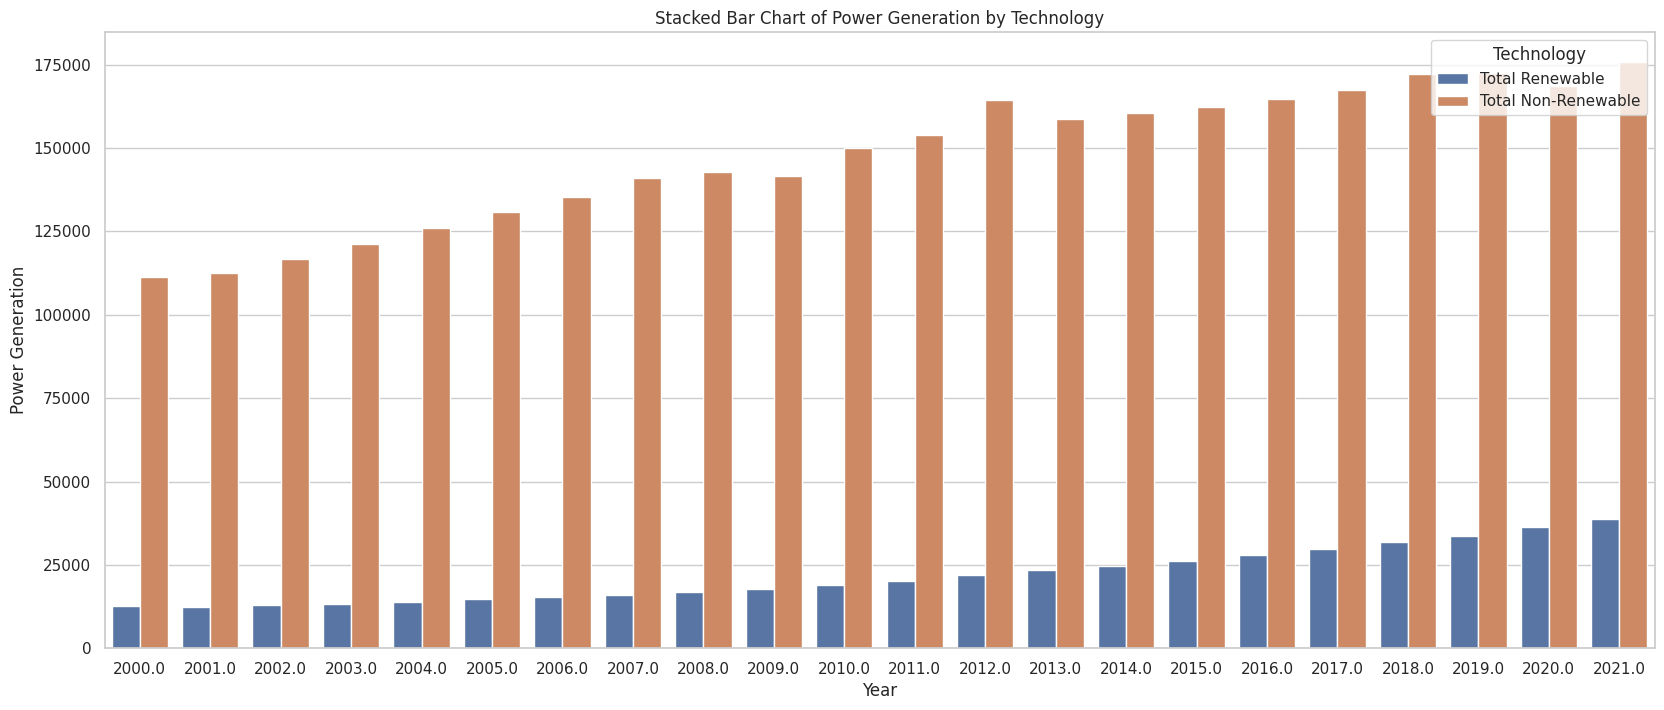

In [ ]:
# Melt the DataFrame to transform wide-format to long-format
df_int = pd.melt(df, id_vars=['Country', 'Energy_Type', 'Unit'],
                  var_name='Year', value_name='Power_Generation')

# Convert 'Year' to numeric type
df_int['Year'] = pd.to_numeric(df_int['Year'].str.extract('(\d+)')[0])

# Convert 'Power_Generation' to numeric type
df_int['Power_Generation'] = pd.to_numeric(df_int['Power_Generation'], errors='coerce')

# Set the style for better visualization
sns.set(style="whitegrid")

# Create a stacked bar chart for all technologies excluding the year 2022
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Year', y='Power_Generation', hue='Energy_Type', data=df_int, errorbar=None)

plt.title('Stacked Bar Chart of Power Generation by Technology')
plt.xlabel('Year')
plt.ylabel('Power Generation')
plt.legend(title='Technology', loc='upper right', bbox_to_anchor=(1, 1))
plt.show()


Throughout the years, there’s an evident dominance of non-renewable energy sources. This could be due to the availability and established infrastructure for non-renewable energy sources like coal, natural gas, and oil.

Starting around 2019, there’s a noticeable increase in renewable energy production. This could be attributed to advancements in renewable energy technologies, cost reductions, and increased awareness about environmental sustainability.

The chart could be indicating the ongoing energy transition from non-renewable to renewable sources. The increasing share of renewable energy suggests efforts towards sustainable energy practices.

Government policies promoting renewable energy could have contributed to the increase in renewable energy production. Policies such as subsidies, tax incentives, and renewable portfolio standards can encourage the use of renewable energy.

If the trend continues, we can expect a significant increase in the share of renewable energy in the coming years. This could have major implications for energy security, environmental sustainability, and economic development.

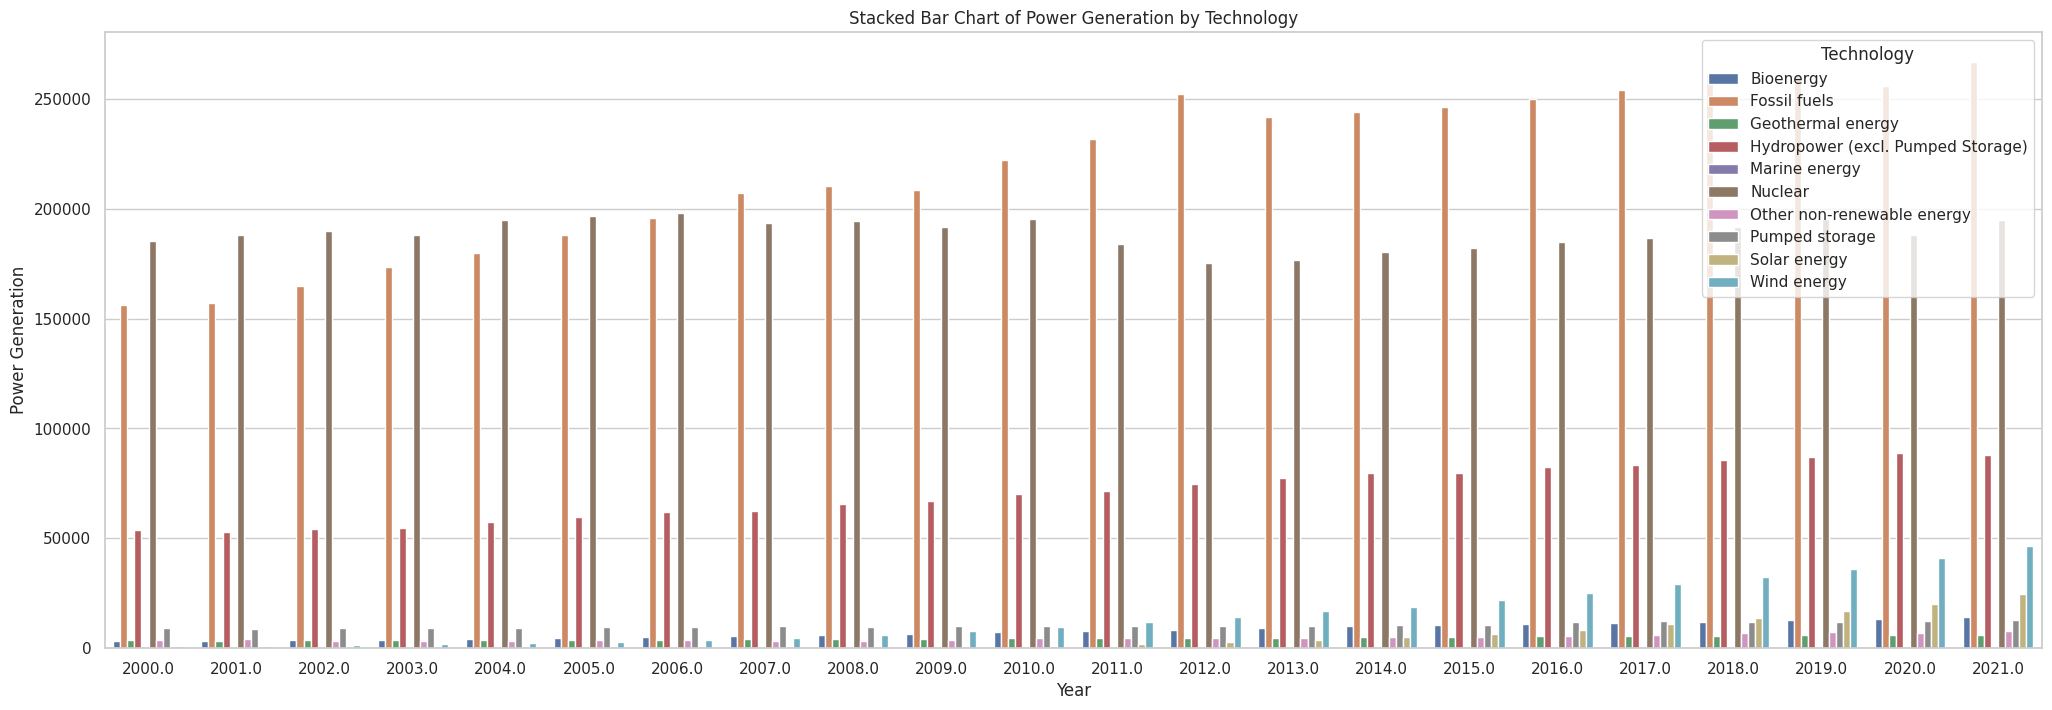

In [ ]:
import seaborn as sns

df_long = pd.melt(df, id_vars=['Country', 'Technology', 'Energy_Type', 'Unit'],
                  var_name='Year', value_name='Power_Generation')

df_long['Year'] = pd.to_numeric(df_long['Year'].str.extract('(\d+)')[0])

df_long['Power_Generation'] = pd.to_numeric(df_long['Power_Generation'], errors='coerce')

sns.set(style="whitegrid")
plt.figure(figsize=(25, 8))
sns.barplot(x='Year', y='Power_Generation', hue='Technology', data=df_long, errorbar=None, palette='deep')
plt.title('Stacked Bar Chart of Power Generation by Technology')
plt.xlabel('Year')
plt.ylabel('Power Generation')
plt.legend(title='Technology', loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

The stacked bars indicate the combined contribution of these technologies to the total power generation for each year. The noticeable increase in total power generation over the years, with significant contributions from wind and solar energies in recent years, can be observed.

The orange bars represent fossil fuels, which dominate most of the years. This indicates that fossil fuels have been a significant source of power, although there appears to be a slight decrease in recent years.

The blue bars represent wind energy, which shows noticeable growth over time. This suggests an increasing reliance on wind energy for power generation.

The yellowish colored bars represent solar energy. While solar energy contributes less compared to wind and fossil fuels, it is also growing, indicating a shift towards more sustainable energy sources.

The chart also includes bioenergy, geothermal energy, hydropower (excluding pumped storage), marine energy, nuclear, other non-renewable energy, and pumped storage. Among these, hydropower has remained relatively consistent in its contribution.

Hence, to answer the question above, Fossil fuels and Nuclear (Non renewable energy) are the main factors contributed to the differences.

### Q4: What is the most used energy and its type over the years? if so, what is the energy?

The most used technology over the years is: Fossil fuels (Energy type - Total Non-Renewable)



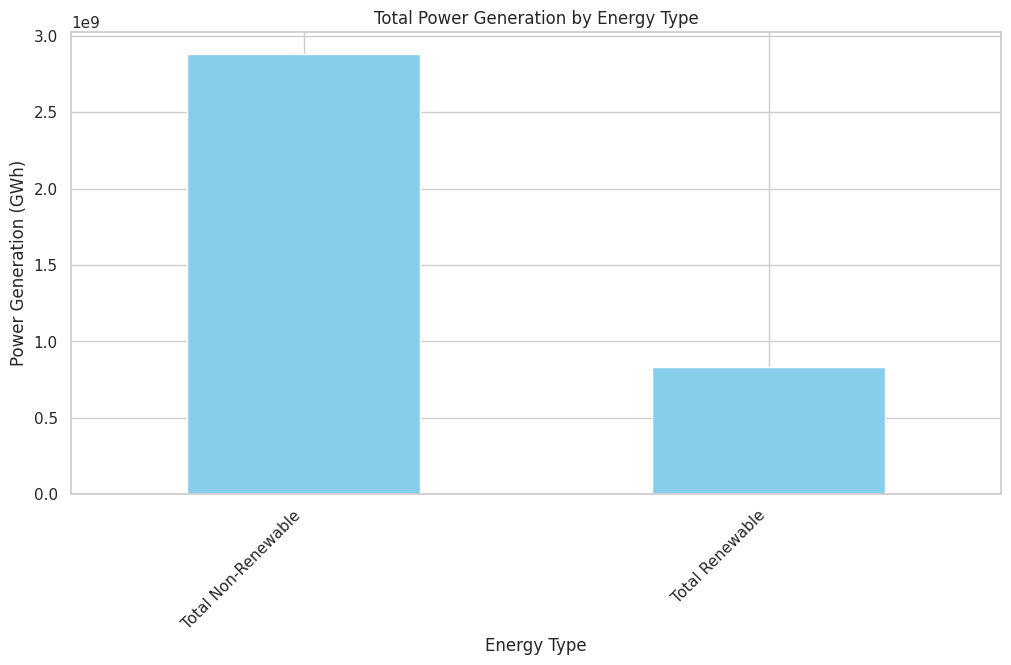

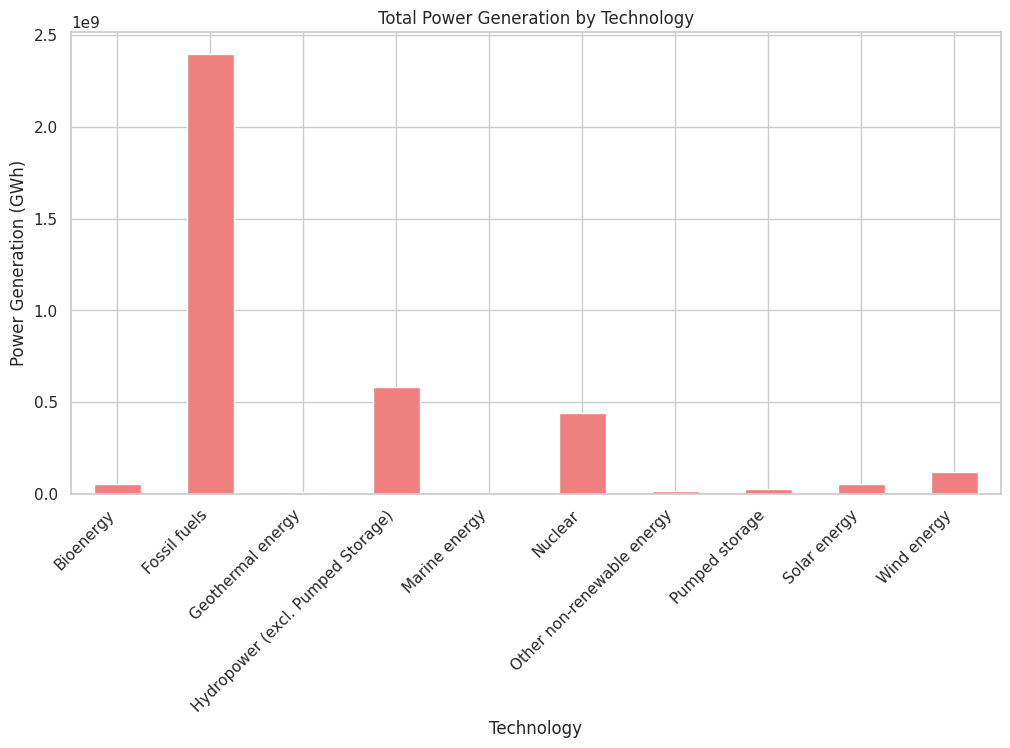

In [ ]:
selected_columns = ['Energy_Type'] + num_cols
energy_type_data = df[selected_columns]
selected_columns = ['Technology'] + num_cols
technology_data = df[selected_columns]

melted_energy_type_data = energy_type_data.melt(id_vars='Energy_Type', var_name='Year', value_name='Power_Generation')
melted_technology_data = technology_data.melt(id_vars='Technology', var_name='Year', value_name='Power_Generation')

melted_energy_type_data['Year'] = melted_energy_type_data['Year'].str.extract('(\d+)').astype(int)
melted_technology_data['Year'] = melted_technology_data['Year'].str.extract('(\d+)').astype(int)

# Group by energy type and sum power generation for each type
total_power_by_energy_type = melted_energy_type_data.groupby('Energy_Type')['Power_Generation'].sum()
total_power_by_technology = melted_technology_data.groupby('Technology')['Power_Generation'].sum()

# Find the most used energy type
most_used_energy_type = total_power_by_energy_type.idxmax()
most_used_technology = total_power_by_technology.idxmax()

print(f"The most used technology over the years is: {most_used_technology} (Energy type - {most_used_energy_type})")
print()
plt.figure(figsize=(12, 6))
total_power_by_energy_type.plot(kind='bar', color='skyblue')
plt.title('Total Power Generation by Energy Type')
plt.xlabel('Energy Type')
plt.ylabel('Power Generation (GWh)')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
total_power_by_technology.plot(kind='bar', color='lightcoral')
plt.title('Total Power Generation by Technology')
plt.xlabel('Technology')
plt.ylabel('Power Generation (GWh)')
plt.xticks(rotation=45, ha='right')
plt.show()

The output printed at the bottom indicates that Fossil fuels (Energy Type - Total Non-Renewable) are identified as being used predominantly. This suggests that despite the global push towards renewable energy sources, non-renewable energy sources like fossil fuels are still the most used.

Vizualize the count of occurrences of each energy used by all countries, sort the data from the highest to the lowest.

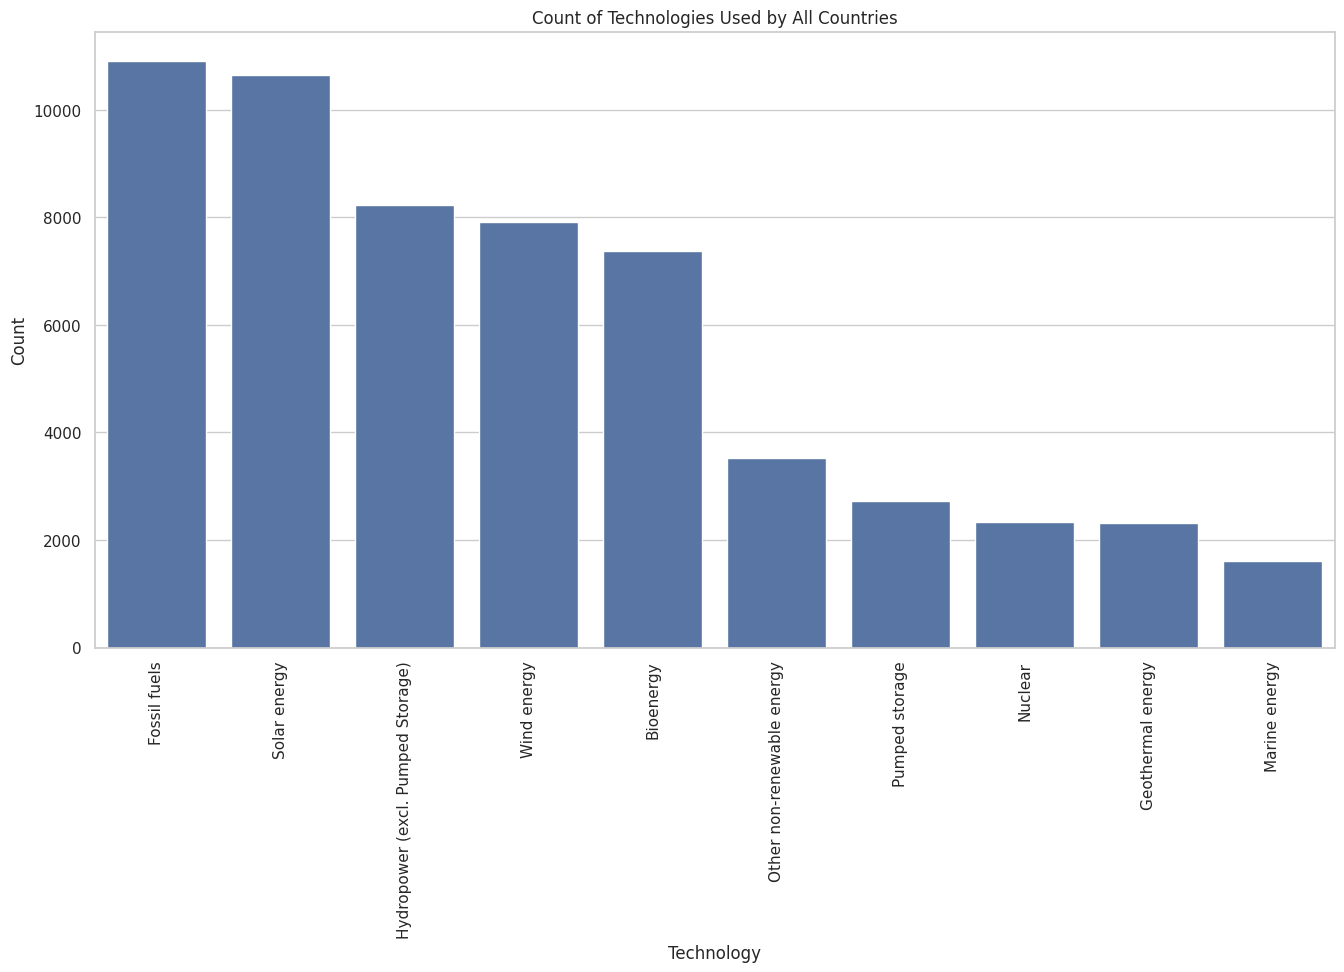

In [ ]:
selected_columns = ['Country'] + ['Technology'] + num_cols
country_technology_data = df[selected_columns]

melted_country_technology_data = country_technology_data.melt(id_vars=['Country', 'Technology'], var_name='Year', value_name='Power_Generation')

melted_country_technology_data['Year'] = melted_country_technology_data['Year'].str.extract('(\d+)').astype(int)

# Create a bar plot for the count of technologies used by all countries (sorted)
sorted_technologies = melted_country_technology_data['Technology'].value_counts().index

sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.countplot(x='Technology', data=melted_country_technology_data, order=sorted_technologies)
plt.title('Count of Technologies Used by All Countries')
plt.xlabel('Technology')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Fossil fuels has the highest count, close to 10,000. This indicates that fossil fuels are the most widely used technology across all countries. However, it’s important to note that fossil fuels are non-renewable and their use contributes to greenhouse gas emissions.

With the second-highest count around 9,000, solar energy is a significant renewable energy source used by many countries. The high usage suggests a global trend towards sustainable and clean energy.

Hydroelectric (Conventional Storage) technology has a count close to 8,000. Hydroelectric power, another form of renewable energy, appears to be in substantial use.

Wind Energy and Bioenergy technologies have counts around 6,000 and 5,000 respectively, indicating a moderate level of usage.

Other types of technology, including Other Renewable Energy, Pumped Storage, Nuclear Energy, Geothermal Energy, and Marine Energy, have significantly lower counts. This could suggest that these technologies are either emerging, less efficient, or less feasible for widespread use.

### Q5: Which countries lead in terms of the highest percentage of electricity generated from renewable sources?

<ipython-input-159-7c30f1c7b56a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_renewable_by_country[top_30_countries], y=top_30_countries, palette='viridis')


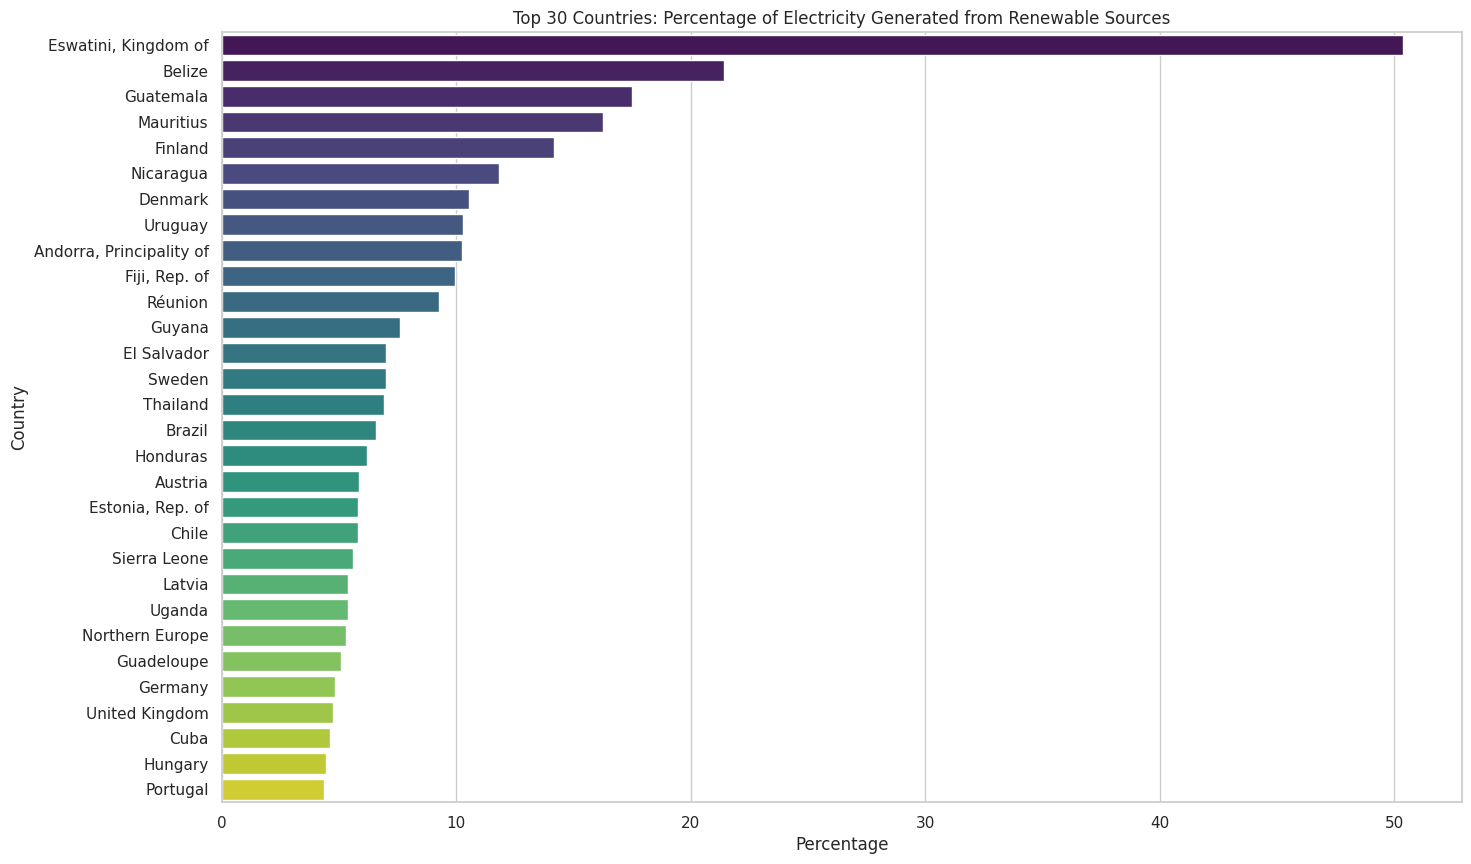

In [ ]:
selected_columns = ['Country'] + ['Technology'] + num_cols
country_technology_data = df[selected_columns]

# Melt the DataFrame for easier analysis
melted_country_technology_data = country_technology_data.melt(id_vars=['Country', 'Technology'], var_name='Year', value_name='Power_Generation')

# Convert 'Year' to numeric type
melted_country_technology_data['Year'] = melted_country_technology_data['Year'].str.extract('(\d+)').astype(int)

# Filter rows where Technology is related to renewable energy
renewable_technologies = ['Bioenergy', 'Geothermal', 'Hydropower', 'Solar', 'Wind']
renewable_data = melted_country_technology_data[melted_country_technology_data['Technology'].isin(renewable_technologies)]

# Group by Country and calculate the total power generation from renewable sources
total_renewable_power_by_country = renewable_data.groupby('Country')['Power_Generation'].sum()

# Group by Country and calculate the total power generation across all sources
total_power_by_country = melted_country_technology_data.groupby('Country')['Power_Generation'].sum()

# Calculate the percentage of electricity generated from renewable sources for each country
percentage_renewable_by_country = (total_renewable_power_by_country / total_power_by_country) * 100

# Select the top 30 countries
top_30_countries = percentage_renewable_by_country.sort_values(ascending=False).head(30).index

# Create a bar plot for the percentage of electricity generated from renewable sources for the top 30 countries
plt.figure(figsize=(16, 10))
sns.barplot(x=percentage_renewable_by_country[top_30_countries], y=top_30_countries, palette='viridis')
plt.title('Top 30 Countries: Percentage of Electricity Generated from Renewable Sources')
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.show()

Eswatini, Kingdom of has the highest percentage of electricity generated from renewable sources among the top 30 countries listed. This suggests a strong commitment to renewable energy.

Belize and Guatemala countries also have high percentages, indicating significant use of renewable energy sources.

Mauritius, Finland, Nicaragua, Denmark, Uruguay, Andorra, Fiji, Reunion, Guyana, El Salvador, Sweden, Thailand, Brazil, Honduras, Austria, Estonia, Chile, Sierra Leone, Latvia, Uganda, Northern Europe, Guadeloupe, Germany, United Kingdom, Cuba, Hungary and Portugal are also on the list, showing a global trend towards the use of renewable energy.

### Q6: How well does the amount of electricity generated and electricity installed capacity data from 2020 predict the amount of electricity generated and electricity installed capacity in 2021 ?

By using machine learning for our Linear regression, we create the following.

In [ ]:
df1 = df[df['Indicator'] == 'Electricity Generation'].copy()
df1 = df1[df1['CTS_Name'] == 'Electricity Generation'].copy()
df1

,Country,Indicator,Technology,Energy_Type,Unit,Source,CTS_Name,CTS_Code,CTS_Full_Descriptor,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Advanced Economies,Electricity Generation,Bioenergy,Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Economic Activity...",110529.797,...,224807.603,239640.576,252158.172,264818.971,276056.357,283070.492,287896.712,293588.304,295120.203,305534.149
2,Advanced Economies,Electricity Generation,Fossil fuels,Total Non-Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Economic Activity...",5564058.840,...,6192503.018,6103856.918,5966436.270,5895416.489,5862722.833,5724890.811,5783838.801,5557306.272,5242216.071,5399809.867
4,Advanced Economies,Electricity Generation,Geothermal energy,Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Economic Activity...",26919.100,...,38076.418,38936.706,40294.244,40949.973,40915.479,41097.443,41910.939,41890.201,42477.922,42591.530
6,Advanced Economies,Electricity Generation,Hydropower (excl. Pumped Storage),Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Economic Activity...",1220326.376,...,1263112.980,1264381.188,1250084.074,1229010.124,1243652.987,1271437.354,1270053.139,1244244.169,1276611.798,1235735.409
8,Advanced Economies,Electricity Generation,Marine energy,Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Economic Activity...",539.307,...,955.411,916.925,990.064,998.806,1015.883,1021.124,994.348,968.282,950.082,944.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,Zambia,Electricity Generation,Solar energy,Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Economic Activity...",0.000,...,0.000,0.104,0.104,0.104,0.163,0.163,1.320,69.886,163.053,160.558
2609,Zimbabwe,Electricity Generation,Bioenergy,Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Economic Activity...",84.550,...,245.181,245.200,221.320,194.960,306.480,76.150,258.260,247.640,153.499,142.999
2611,Zimbabwe,Electricity Generation,Fossil fuels,Total Non-Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Economic Activity...",3793.372,...,3575.000,4022.458,4380.360,4277.000,4065.900,3685.800,3661.550,3661.400,2477.300,2507.790
2613,Zimbabwe,Electricity Generation,Hydropower (excl. Pumped Storage),Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Economic Activity...",3205.439,...,5393.702,4999.441,5466.411,5047.208,2692.085,4084.680,5634.960,5508.851,3880.029,6014.760


Intercept: -153.30015065369662
Slope (Coefficient): 1.0518949405831264


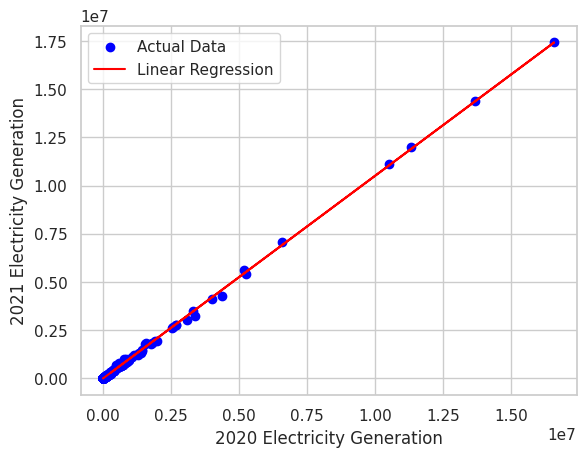

In [ ]:
from sklearn.linear_model import LinearRegression


# Reshape the data for linear regression
x = np.array(df1['2020']).reshape(-1, 1)
y = np.array(df1['2021'])

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Predict values for 2021 based on the model using the same data
predicted_2021_from_x = model.predict(x)

# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Slope (Coefficient): {model.coef_[0]}')

# Plot the data and regression line
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, predicted_2021_from_x, color='red', label='Linear Regression')
plt.xlabel('2020 Electricity Generation')
plt.ylabel('2021 Electricity Generation')
plt.legend()
plt.show()


The scatter plot shows a positive linear relationship between the Electricity Generation from 2020 and 2021. This means that as the Electricity Generation increase in 2020, they also increase in 2021. The slope of the regression line indicates that for every unit increase in 2020, there is an increase in 2021.

The predicted values from the linear regression model align closely with the actual values, indicating a good fit of the model. This suggests that the model is effective in predicting the Electricity Generation in 2021 based on the data from 2020.

Now we will do another linear regression for electricity installed capacity.

In [ ]:
df2 = df[df['Indicator'] == 'Electricity Installed Capacity'].copy()
df2 = df2[df2['CTS_Name'] == 'Electricity Installed Capacity'].copy()
df2

,Country,Indicator,Technology,Energy_Type,Unit,Source,CTS_Name,CTS_Code,CTS_Full_Descriptor,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Advanced Economies,Electricity Installed Capacity,Bioenergy,Total Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,ECNEC,"Environment, Climate Change, Economic Activity...",17792.003,...,44313.883,46735.884,48957.209,51141.829,53558.147,55928.762,58784.512,60506.886,61435.714,60191.382
3,Advanced Economies,Electricity Installed Capacity,Fossil fuels,Total Non-Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,ECNEC,"Environment, Climate Change, Economic Activity...",1267339.571,...,1548594.145,1535785.321,1543697.011,1520695.067,1507693.183,1505545.142,1516077.653,1490202.489,1480381.560,1474449.617
5,Advanced Economies,Electricity Installed Capacity,Geothermal energy,Total Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,ECNEC,"Environment, Climate Change, Economic Activity...",4506.200,...,5295.615,5395.015,5466.315,5525.265,5509.774,5465.613,5501.243,5625.613,5687.313,5722.363
7,Advanced Economies,Electricity Installed Capacity,Hydropower (excl. Pumped Storage),Total Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,ECNEC,"Environment, Climate Change, Economic Activity...",312093.010,...,339528.789,340980.823,341549.459,346529.536,350020.772,351665.205,353760.499,354375.392,355702.403,357972.713
9,Advanced Economies,Electricity Installed Capacity,Marine energy,Total Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,ECNEC,"Environment, Climate Change, Economic Activity...",234.000,...,502.959,503.166,505.831,505.742,511.672,515.568,515.660,514.040,511.995,511.672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,Zambia,Electricity Installed Capacity,Solar energy,Total Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,ECNEC,"Environment, Climate Change, Economic Activity...",0.000,...,0.000,0.060,0.060,0.060,0.094,0.094,1.224,96.424,96.424,96.424
2610,Zimbabwe,Electricity Installed Capacity,Bioenergy,Total Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,ECNEC,"Environment, Climate Change, Economic Activity...",61.500,...,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2612,Zimbabwe,Electricity Installed Capacity,Fossil fuels,Total Non-Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,ECNEC,"Environment, Climate Change, Economic Activity...",1190.000,...,1200.000,1200.000,1200.000,1200.000,1200.000,1200.750,1200.750,1200.750,1200.750,1200.750
2614,Zimbabwe,Electricity Installed Capacity,Hydropower (excl. Pumped Storage),Total Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,ECNEC,"Environment, Climate Change, Economic Activity...",667.185,...,752.330,757.370,757.370,772.385,776.135,780.035,1080.035,1080.015,1080.015,1080.015


Intercept: 719.1703788831073
Slope (Coefficient): 1.0229307890421226


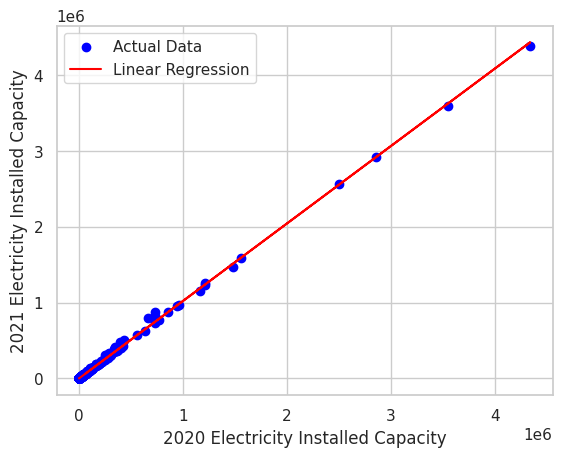

In [ ]:
# Reshape the data for linear regression
x1 = np.array(df2['2020']).reshape(-1, 1)
y1 = np.array(df2['2021'])

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x1, y1)

# Predict values for 2021 based on the model using the same data
predicted_2021_from_x1 = model.predict(x1)

# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Slope (Coefficient): {model.coef_[0]}')

# Plot the data and regression line
plt.scatter(x1, y1, color='blue', label='Actual Data')
plt.plot(x1, predicted_2021_from_x1, color='red', label='Linear Regression')
plt.xlabel('2020 Electricity Installed Capacity')
plt.ylabel('2021 Electricity Installed Capacity')
plt.legend()
plt.show()


The scatter plot shows a positive linear relationship between the Electricity Installed Capacity from 2020 and 2021. This means that as the Electricity Installed Capacity increase in 2020, they also increase in 2021. The slope of the regression line indicates that for every unit increase in 2020, there is an increase in 2021.

The predicted values from the linear regression model align closely with the actual values, indicating a good fit of the model. This suggests that the model is effective in predicting the Electricity Installed Capacity in 2021 based on the data from 2020.